## Reproduce Fig. 2d, Supp. Figs 4-5
Oxbench and Homstrad clustering, starting from score files. See analysis directory for production of score files.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
import scipy.cluster.hierarchy as hier
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sys
import random
import os
import Levenshtein
import fastcluster as fc
# To allow imports from common directory
sys.path.append('../../')
from common.plot_style_utils import set_pub_plot_context, rep_names
from common.embedding_tools import lev_dist_matrix, lev_sim_matrix

%matplotlib inline
random.seed(42)
np.random.seed(42)


In [2]:
# Reps to present in the main text
ox_main = ['sequence', 'RGN', 'avg_hidden', 'arnold_original_3_7', 'simple_freq_and_len']
hom_main = ['sequence', 'RGN', 'avg_hidden', 'arnold_original_3_7', 'tfidf_3grams']

In [3]:
ox_suppl = pd.read_csv("../../data/oxbench_agglom_results.csv")
ox_suppl.columns = ["name"] + ox_suppl.columns.values.tolist()[1:]
ox_suppl

,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,sequence,0.044860,0.189096,0.182135
1,RGN,0.429791,0.455848,0.512596
2,64_avg_hidden,0.340007,0.353363,0.415784
3,64_final_hidden,0.218473,0.251591,0.322424
4,64_final_cell,0.244331,0.257780,0.345796
5,256_avg_hidden,0.511640,0.532204,0.471641
6,256_final_cell,0.223316,0.305762,0.378968
7,avg_hidden,0.628294,0.643243,0.579816
8,final_hidden,0.511814,0.543605,0.540769
9,final_cell,0.221697,0.311505,0.435509


In [4]:
ox_results = ox_suppl[ox_suppl['name'].isin(ox_main)]
ox_results

,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,sequence,0.044860,0.189096,0.182135
1,RGN,0.429791,0.455848,0.512596
7,avg_hidden,0.628294,0.643243,0.579816
10,arnold_original_3_7,0.599779,0.613676,0.575188
22,simple_freq_and_len,0.451528,0.462657,0.486758


In [5]:
homstrad_suppl = pd.read_csv("../../data/homstrad_agglom_results.csv")
homstrad_suppl.columns = ["name"] + homstrad_suppl.columns.values.tolist()[1:]
homstrad_suppl

,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,sequence,0.003666,0.050649,0.109055
1,RGN,0.254722,0.310960,0.461505
2,64_avg_hidden,0.105519,0.111209,0.199143
3,64_final_hidden,0.053002,0.066489,0.128225
4,64_final_cell,0.059149,0.063566,0.121975
5,256_avg_hidden,0.120556,0.131132,0.226122
6,256_final_cell,0.044765,0.111343,0.242811
7,avg_hidden,0.289274,0.318563,0.438337
8,final_hidden,0.073021,0.121485,0.293113
9,final_cell,0.044791,0.126025,0.306720


In [6]:
homstrad_results = homstrad_suppl[homstrad_suppl['name'].isin(hom_main)]
homstrad_results

,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,sequence,0.003666,0.050649,0.109055
1,RGN,0.254722,0.310960,0.461505
7,avg_hidden,0.289274,0.318563,0.438337
10,arnold_original_3_7,0.155078,0.197837,0.354528
26,tfidf_3grams,0.115079,0.180524,0.461597


In [7]:
# Get the pretty print names
ox_suppl['name'] = [rep_names[n] for n in ox_suppl['name']]
ox_results['name'] = [rep_names[n] for n in ox_results['name']]
display(ox_suppl)
ox_results

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,Levenshtein (generalized edit) distance,0.044860,0.189096,0.182135
1,RGN,0.429791,0.455848,0.512596
2,UniRep 64-unit Avg. Hidden State,0.340007,0.353363,0.415784
3,UniRep 64-unit Final Hidden State,0.218473,0.251591,0.322424
4,UniRep 64-unit Final Cell State,0.244331,0.257780,0.345796
5,UniRep 256-unit Avg. Hidden State,0.511640,0.532204,0.471641
6,UniRep 64-unit Final Hidden State,0.223316,0.305762,0.378968
7,UniRep 1900-unit Avg. Hidden State,0.628294,0.643243,0.579816
8,UniRep 1900-unit Final Hidden State,0.511814,0.543605,0.540769
9,UniRep 1900-unit Final Cell State,0.221697,0.311505,0.435509


,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,Levenshtein (generalized edit) distance,0.044860,0.189096,0.182135
1,RGN,0.429791,0.455848,0.512596
7,UniRep 1900-unit Avg. Hidden State,0.628294,0.643243,0.579816
10,Doc2Vec Original k=3 w=7,0.599779,0.613676,0.575188
22,Our Baseline: Amino Acid Freq. and Protein Length,0.451528,0.462657,0.486758


In [8]:
# Get the pretty print names
homstrad_suppl['name'] = [rep_names[n] for n in homstrad_suppl['name']]
homstrad_results['name'] = [rep_names[n] for n in homstrad_results['name']]
display(homstrad_suppl)
homstrad_results

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,Levenshtein (generalized edit) distance,0.003666,0.050649,0.109055
1,RGN,0.254722,0.310960,0.461505
2,UniRep 64-unit Avg. Hidden State,0.105519,0.111209,0.199143
3,UniRep 64-unit Final Hidden State,0.053002,0.066489,0.128225
4,UniRep 64-unit Final Cell State,0.059149,0.063566,0.121975
5,UniRep 256-unit Avg. Hidden State,0.120556,0.131132,0.226122
6,UniRep 64-unit Final Hidden State,0.044765,0.111343,0.242811
7,UniRep 1900-unit Avg. Hidden State,0.289274,0.318563,0.438337
8,UniRep 1900-unit Final Hidden State,0.073021,0.121485,0.293113
9,UniRep 1900-unit Final Cell State,0.044791,0.126025,0.306720


,name,Adjusted Rand Index,Fowlkes Mallows Index,Adjusted Mutual Information
0,Levenshtein (generalized edit) distance,0.003666,0.050649,0.109055
1,RGN,0.254722,0.310960,0.461505
7,UniRep 1900-unit Avg. Hidden State,0.289274,0.318563,0.438337
10,Doc2Vec Original k=3 w=7,0.155078,0.197837,0.354528
26,Our Baseline: 3-grams with TF-IDF weighting,0.115079,0.180524,0.461597


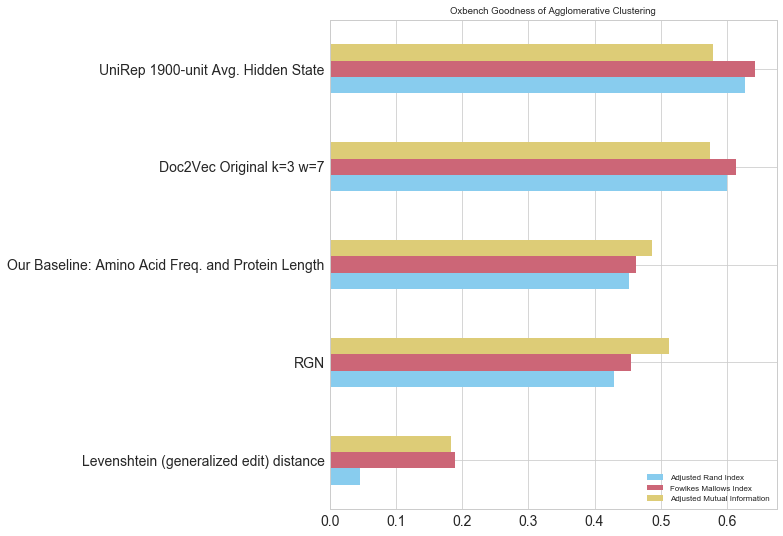

In [9]:
set_pub_plot_context(context="paper")
ax = ox_results.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", figsize=(8,9), fontsize=14, title="Oxbench Goodness of Agglomerative Clustering")
ax.set(ylabel='')
plt.show()

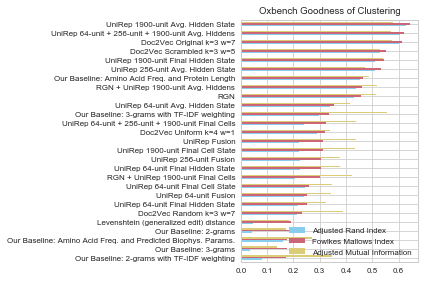

In [10]:
ax = ox_suppl.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", figsize=(6,4), title="Oxbench Goodness of Clustering")
ax.set(ylabel='')
plt.tight_layout()
plt.savefig("./img/supp4.png", dpi=500)

plt.show()

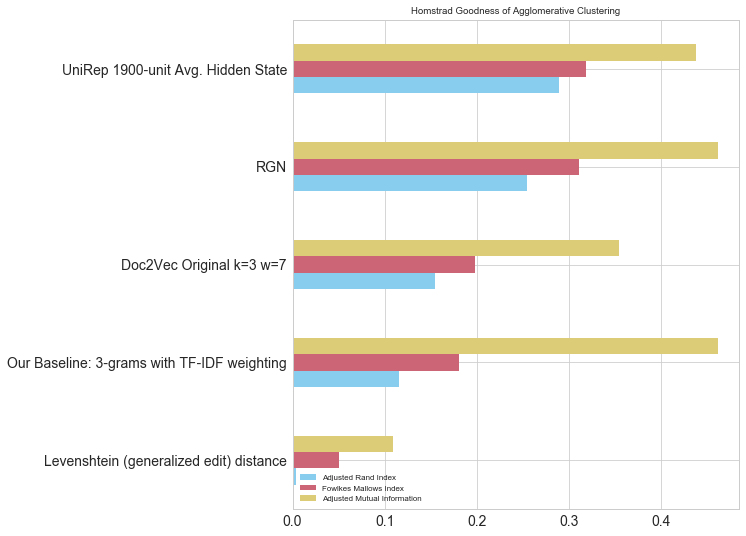

In [11]:
ax = homstrad_results.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", figsize=(8,9), fontsize=14, title="Homstrad Goodness of Agglomerative Clustering")
ax.set(ylabel='')
plt.show()

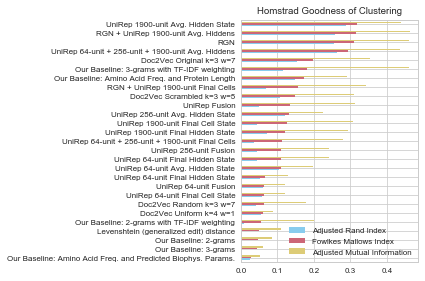

In [12]:
ax = homstrad_suppl.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", figsize=(6,4), title="Homstrad Goodness of Clustering")
ax.set(ylabel='')
plt.tight_layout()
plt.savefig("./img/supp5", dpi=500)
plt.show()

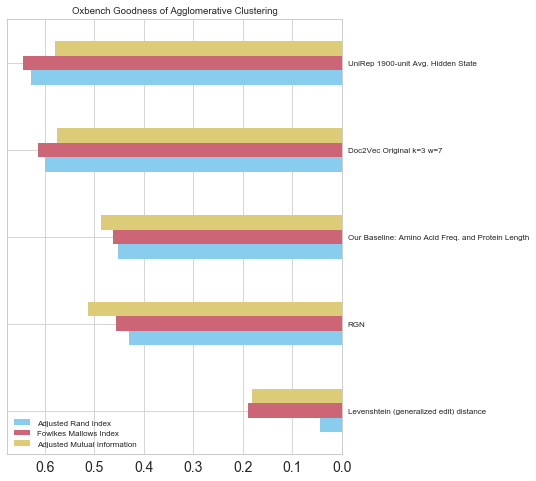

In [13]:
ax = ox_results.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", figsize=(6,8), fontsize=14, title="Oxbench Goodness of Agglomerative Clustering")
ax.set(ylabel='')
ax.invert_xaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
plt.show()

/media/sandias42/ExDrive/Software/Python/Anaconda/envs/prepcustom/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


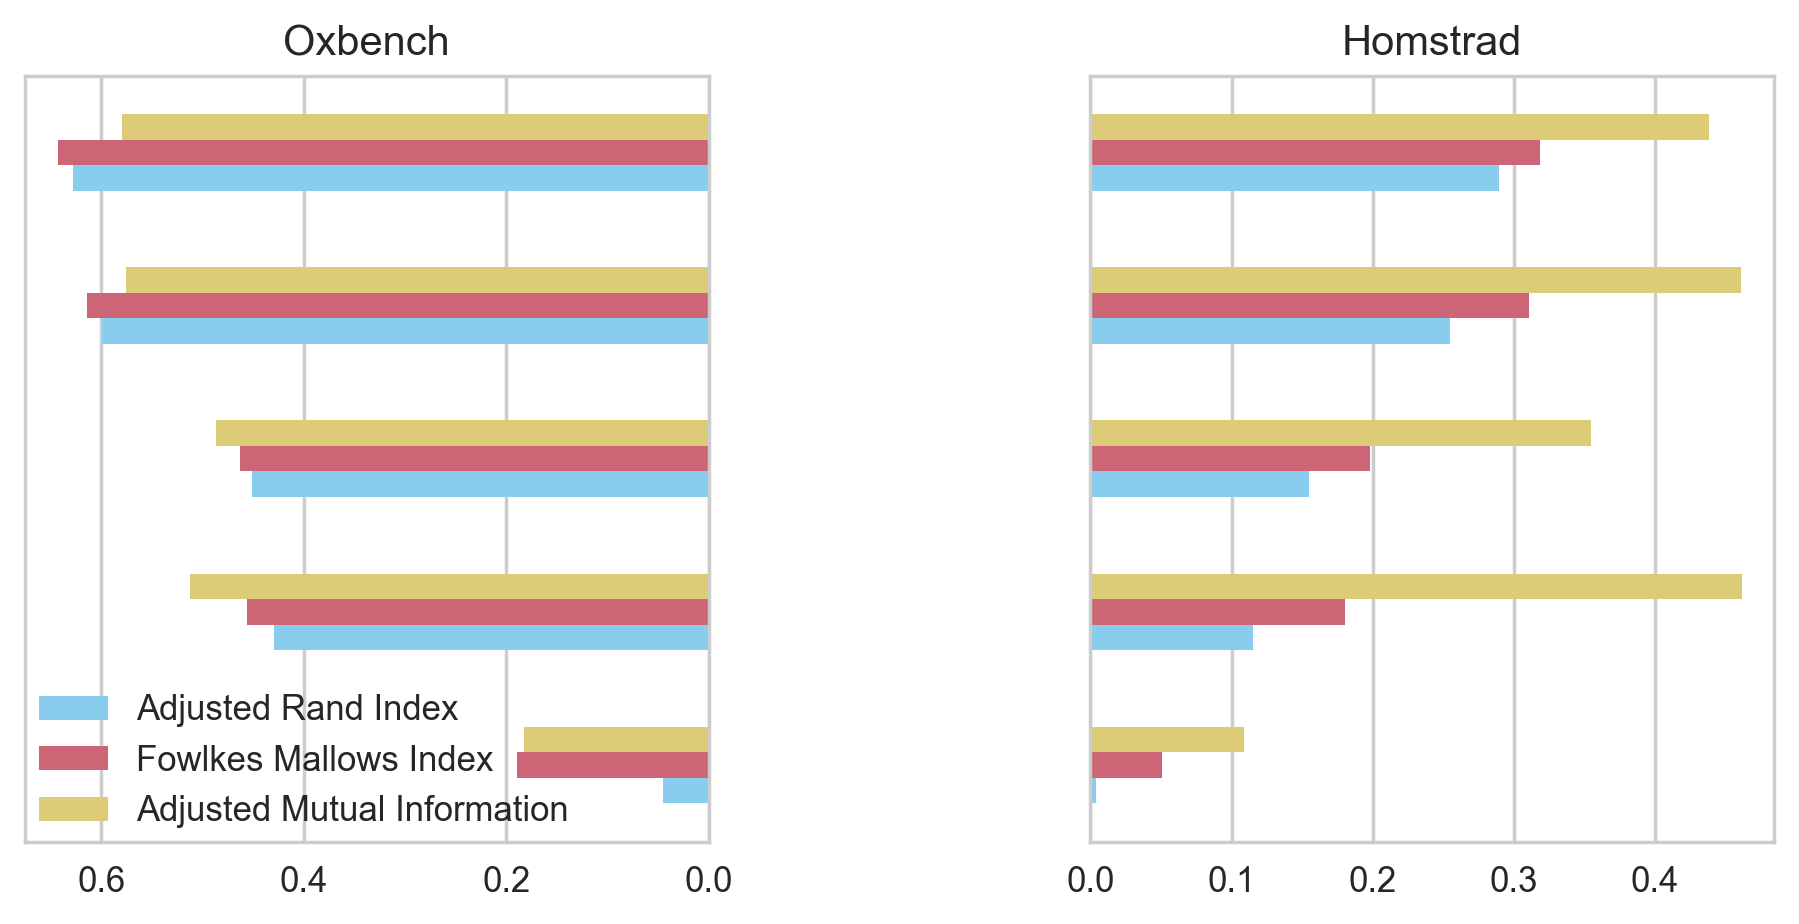

In [14]:
# Save the final joint figure with room in the middle to edit in nicely formatted text labels.
# Bars were recolored in final figure construction.

params = {
    'pad':.01,
    'w_pad':8,
    'h_pad':0,
    'rect':(0,0,1,1),
}
fig = plt.figure(figsize=(7,3.5), dpi=250, tight_layout=params)
set_pub_plot_context(context="notebook")
ax1 = fig.add_subplot(1,2,1,
                     title="Oxbench",
                     )
ox_results.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh", ax=ax1)
ax1.set(ylabel='')
ax1.yaxis.set_major_locator(plt.NullLocator())
ax1.invert_xaxis()
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position('right')
ax1.legend(loc="lower left", fontsize=10,borderaxespad=0)

#ax1.legend_.remove()

ax2 = fig.add_subplot(1,2,2,
                     title="Homstrad",
                     )
homstrad_results.set_index('name').sort_values(ascending=True, by="Fowlkes Mallows Index").plot(kind="barh",ax=ax2)
ax2.set(ylabel='')
ax2.yaxis.set_major_locator(plt.NullLocator())
ax2.legend_.remove()
#ax2.legend(loc="lower right", fontsize=8)
fig.savefig("./img/e", dpi=250)